# Simple Machine Learning Solutions for this dataset

In [1]:
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./Data/academic_data.csv')

In [3]:
y = data['will_go_to_college']
X = data.drop('will_go_to_college',axis=1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y)

In [5]:
randomforest = RandomForestClassifier(n_estimators=500,random_state=0)
randomforest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500, random_state=0)

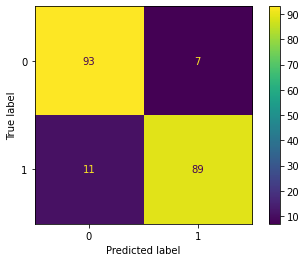

In [6]:
y_predict = randomforest.predict(X_test)
matrix = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=randomforest.classes_)
disp.plot()
plt.show()

In [7]:
xgb = XGBClassifier(n_estimators=500,random_state=0, learning_rate=0.05)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

0.92


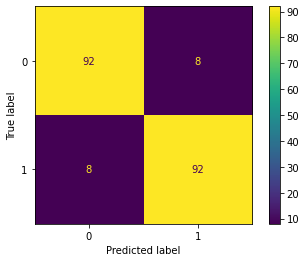

In [8]:
y_predict = xgb.predict(X_test)
print(precision_score(y_test,y_predict))
matrix = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=xgb.classes_)
disp.plot()
plt.show()

In [9]:
catboost = CatBoostClassifier(iterations=100,
                           depth=4,
                           learning_rate=1,
                           loss_function='Logloss',
                           verbose=False)
catboost.fit(X_train,y_train)

0.9354838709677419


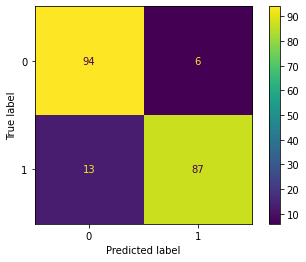

In [10]:
y_predict = catboost.predict(X_test)
print(precision_score(y_test,y_predict))
matrix = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=catboost.classes_)
disp.plot()
plt.show()

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=X.shape[1]),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1,activation='sigmoid')
    ])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.Precision()])
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
25/25 [==============================] - 1s 2ms/step - loss: 0.6844 - precision_1: 0.5474
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6704 - precision_1: 0.5900
Epoch 3/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6531 - precision_1: 0.6077
Epoch 4/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6275 - precision_1: 0.6968
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6058 - precision_1: 0.7064
Epoch 6/50
25/25 [==============================] - 0s 1ms/step - loss: 0.5774 - precision_1: 0.7140
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.5584 - precision_1: 0.7616
Epoch 8/50
25/25 [==============================] - 0s 1ms/step - loss: 0.5193 - precision_1: 0.7545
Epoch 9/50
25/25 [==============================] - 0s 1ms/step - loss: 0.4967 - precision_1: 0.7724
Epoch 10/50
25/25 [==============================] - 0s 2ms/step - loss: 0.4632 - precision

In [18]:
model_prediction = (model.predict(X_test) > 0.5).astype("int32")

7/7 [==============================] - 0s 997us/step


In [19]:
print(precision_score(y_test,y_predict))
matrix = confusion_matrix(y_test, model_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=catboost.classes_)
disp.plot()
plt.show()

0.9456521739130435